In [6]:
import pandas as pd  #  thư viện Pandas để làm việc với dữ liệu dạng bảng
from sklearn.preprocessing import LabelEncoder  #  class LabelEncoder từ thư viện scikit-learn để chuyển đổi dữ liệu categorical thành dạng số
from sklearn.naive_bayes import GaussianNB  #  mô hình Naive Bayes từ scikit-learn, cụ thể là Gaussian Naive Bayes
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report  #  các hàm và class để đánh giá mô hình như confusion matrix và classification report
import matplotlib.pyplot as plt  #  thư viện matplotlib để vẽ biểu đồ

# Đường dẫn đến file chứa dữ liệu CSV
file_path = 'Data/Book2.csv'

# Đọc dữ liệu từ file CSV vào DataFrame của Pandas
data = pd.read_csv(file_path)

In [7]:
# Dùng LabelEncoder để chuyển các cột categorical thành dạng số và lưu trữ các label encoder vào `label_encoders`
label_encoders = {}
for column in ['age_group', 'serum_creatinine']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Chia dữ liệu thành tập train và tập test
test_size = 60
train_size = len(data) - test_size


In [8]:

X_train = data.iloc[:train_size].drop('DEATH_EVENT', axis=1)  # Các feature của tập train
y_train = data.iloc[:train_size]['DEATH_EVENT']  # Nhãn của tập train

X_test = data.iloc[train_size:].drop('DEATH_EVENT', axis=1)  # Các feature của tập test
y_test = data.iloc[train_size:]['DEATH_EVENT']  # Nhãn của tập test

# Huấn luyện mô hình Gaussian Naive Bayes trên tập train
model = GaussianNB()
model.fit(X_train, y_train)

# Dự đoán nhãn trên tập test sử dụng mô hình đã huấn luyện
y_pred = model.predict(X_test)

# Tính confusion matrix để đánh giá hiệu suất của mô hình
cm = confusion_matrix(y_test, y_pred)

# Tính và in ra các giá trị True Positives, False Negatives, False Positives, True Negatives từ confusion matrix
tp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
tn = cm[0, 0]

cm_values = {
    "True Positives (TP)": tp,
    "False Negatives (FN)": fn,
    "False Positives (FP)": fp,
    "True Negatives (TN)": tn
}

In [9]:

# Tính và in ra classification report bao gồm precision, recall, và f1-score
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nConfusion Matrix Values:")
print(cm_values)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[47 10]
 [ 2  1]]

Confusion Matrix Values:
{'True Positives (TP)': 1, 'False Negatives (FN)': 2, 'False Positives (FP)': 10, 'True Negatives (TN)': 47}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        57
           1       0.09      0.33      0.14         3

    accuracy                           0.80        60
   macro avg       0.53      0.58      0.51        60
weighted avg       0.92      0.80      0.85        60


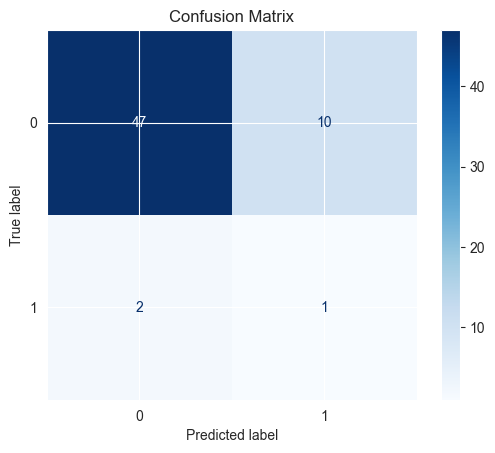

In [18]:
# Vẽ biểu đồ confusion matrix sử dụng ConfusionMatrixDisplay từ thư viện matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=True, values_format='.0f')
plt.title("Confusion Matrix")
plt.show()
